Converged at iteration no. 5


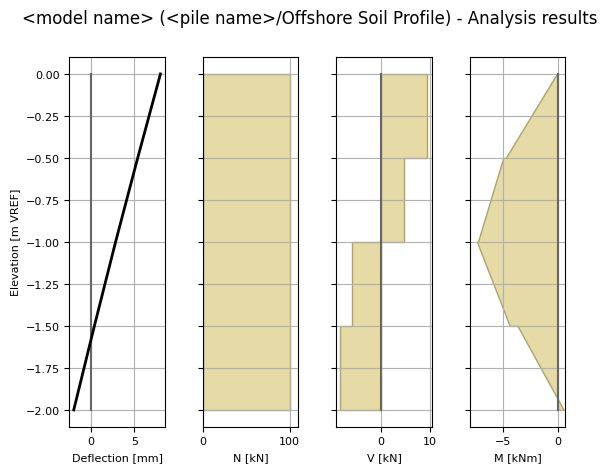

In [3]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-2, diameter=0.2, wt=0.05
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-2, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Px=100, Py=10)
# M.set_pointdisplacement(elevation=-0.0, Ty=0.008)

# Run analysis
from openpile.analyze import winkler
import matplotlib.pyplot as plt

Result = winkler(M)

# plot the results
Result.plot()